In [1]:
from torchvision import models, datasets
import torch
import torchvision.transforms as T
from tqdm.notebook import tqdm

In [2]:
import sys
sys.path.insert(0, "./../")

In [3]:
from src.model import get_model_instance_segmentation
from src.test_utils import test_model_on_dataset, get_inference_time, get_model_prediction_one_image, get_model_size_mb
from src.references.detection import coco_utils
import src.references.detection.transforms as TL
from src.visual_utils import show_coco_dataset_item, show_instance_segmentation_by_model_predictions

In [4]:
COCO_ROOT_PATH = "/data"

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cpu_device = torch.device("cpu")
# device = cpu_device

### Load dataset

In [6]:
common_transforms = TL.Compose([TL.ToTensor()])

dataset = coco_utils.get_coco(COCO_ROOT_PATH, "val", common_transforms, dataset_len=200)

loading annotations into memory...
Done (t=1.95s)
creating index...
index created!


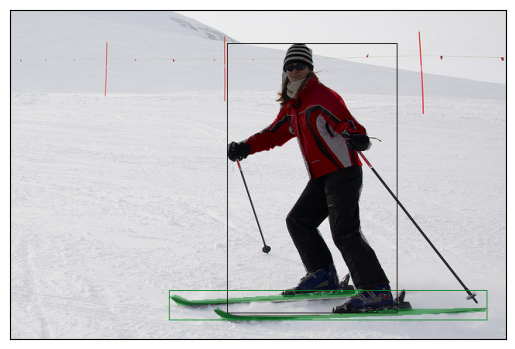

In [7]:
show_coco_dataset_item(dataset[5])

In [8]:
len(dataset)

200

### Load model

In [9]:
model = get_model_instance_segmentation()

### Get memory

In [10]:
get_model_size_mb(model)

169.78314590454102

### Test inference on one image

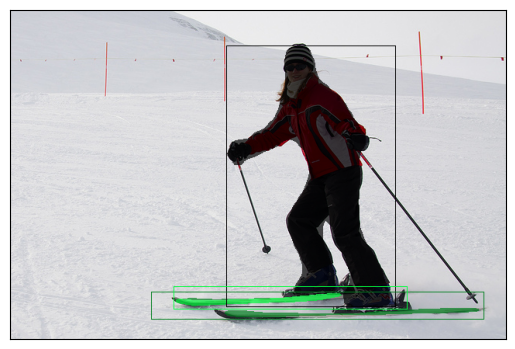

In [11]:
item_index = 5
img = dataset[item_index][0]
pred = get_model_prediction_one_image(img, model, device)
show_instance_segmentation_by_model_predictions(img, pred)

### Measure model performance

#### Metrics

In [12]:
test_model_on_dataset(model, dataset, device)

Test:  [  0/200]  eta: 0:04:45  model_time: 0.8360 (0.8360)  evaluator_time: 0.4294 (0.4294)  time: 1.4286  data: 0.1620  max mem: 575
Test:  [199/200]  eta: 0:00:00  model_time: 0.3885 (0.4963)  evaluator_time: 0.1070 (0.1798)  time: 0.7148  data: 0.0738  max mem: 613
Test: Total time: 0:02:31 (0.7591 s / it)
Averaged stats: model_time: 0.3885 (0.4963)  evaluator_time: 0.1070 (0.1798)
Accumulating evaluation results...
DONE (t=2.33s).
Accumulating evaluation results...
DONE (t=2.37s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.424
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.645
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.476
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.281
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.470
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.580
 Average Rec

In [13]:
test_model_on_dataset(model, dataset, device, cat_ids=[1]) # person

Test:  [  0/200]  eta: 0:04:04  model_time: 0.8037 (0.8037)  evaluator_time: 0.2661 (0.2661)  time: 1.2214  data: 0.1478  max mem: 613
Test:  [199/200]  eta: 0:00:00  model_time: 0.3849 (0.4825)  evaluator_time: 0.0907 (0.1344)  time: 0.7325  data: 0.0842  max mem: 613
Test: Total time: 0:02:19 (0.6984 s / it)
Averaged stats: model_time: 0.3849 (0.4825)  evaluator_time: 0.0907 (0.1344)
Accumulating evaluation results...
DONE (t=0.14s).
Accumulating evaluation results...
DONE (t=0.20s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.519
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.826
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.534
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.325
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.615
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.663
 Average Rec

#### Inference time

In [14]:
model = model.to(device)
model = model.eval()
total_time = 0
for i, dataset_item in tqdm(enumerate(dataset), total=len(dataset)):
    input_image = dataset_item[0]
    img = input_image.to(device)
    item_time = get_inference_time(img, model, device)
    total_time += item_time
print(f"Mean time: {total_time / len(dataset)}")

  0%|          | 0/200 [00:00<?, ?it/s]

Mean time: 0.4236560559272766
